<a href="https://colab.research.google.com/github/zain4cs/Housing_prices_dataset/blob/main/House_Prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("/content/Housing.csv")
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [3]:
df.isnull().sum().sort_values(ascending=False)

,0
price,0
area,0
bedrooms,0
bathrooms,0
stories,0
mainroad,0
guestroom,0
basement,0
hotwaterheating,0
airconditioning,0


In [4]:
data_num = df.select_dtypes(include=['int','float']).columns
data_num

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking'], dtype='object')

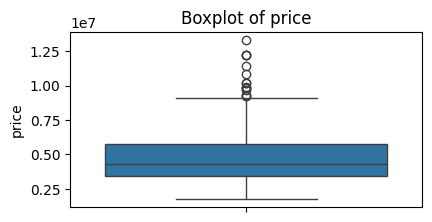

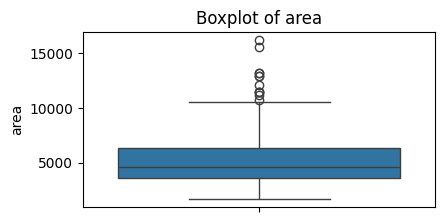

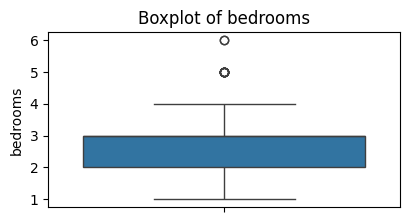

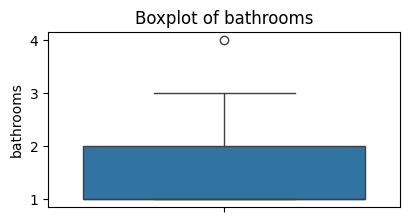

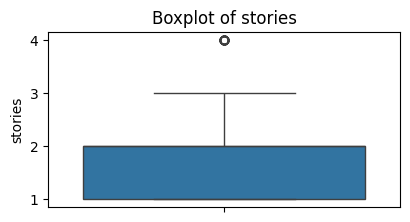

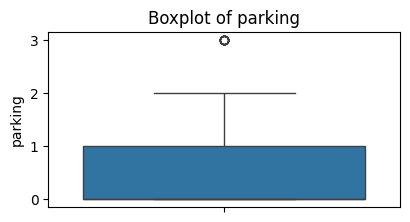

In [5]:
for col in df.select_dtypes(include=['int','float']).columns:
  plt.figure(figsize=(10,5))
  plt.subplot(2,2,1)
  sns.boxplot(df[col])
  plt.title(f"Boxplot of {col}")
  plt.show()

In [6]:
df_filter = {}
for col in data_num:
  Q1 = df[col].quantile(0.25)
  Q3 = df[col].quantile(0.75)
  IQR = Q3 - Q1
  lower = Q1 - 1.5 * IQR
  upper = Q3 + 1.5 * IQR
  outlier = df[(df[col]<=lower) | (df[col]>upper)]
  df_filter[col] = len(outlier)
  data_series = pd.Series(df_filter).sort_values()

In [7]:
print(data_series)

bathrooms     1
area         12
bedrooms     12
parking      12
price        15
stories      41
dtype: int64


In [8]:
df['log_price'] = np.log(df['price'])
df['log_price']

,log_price
0,16.403275
1,16.321036
2,16.321036
3,16.318175
4,16.250001
...,...
540,14.414347
541,14.384879
542,14.375126
543,14.375126


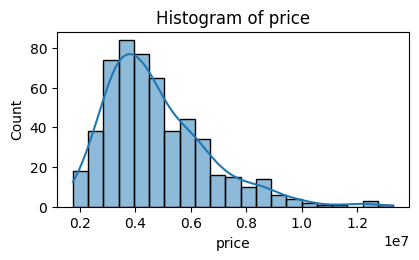

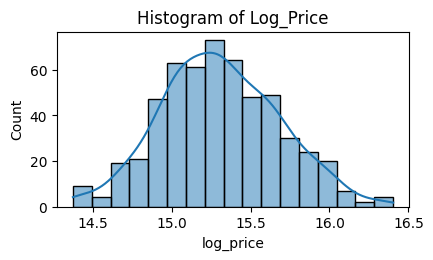

In [9]:
plt.figure(figsize=(10,5))
plt.subplot(2,2,1)
sns.histplot(df['price'], kde=True)
plt.title("Histogram of price")
plt.show()

plt.figure(figsize=(10,5))
plt.subplot(2,2,2)
sns.histplot(df['log_price'], kde=True)
plt.title("Histogram of Log_Price")
plt.show()

In [10]:
df['area_log'] = np.log(df['area'])

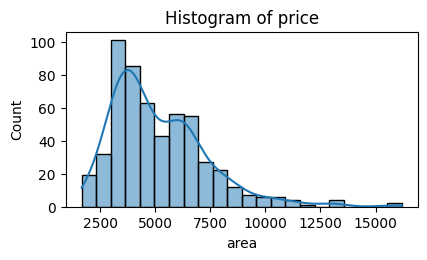

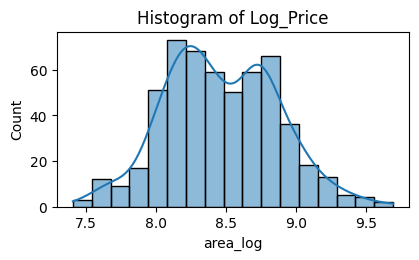

In [11]:
plt.figure(figsize=(10,5))
plt.subplot(2,2,1)
sns.histplot(df['area'], kde=True)
plt.title("Histogram of price")
plt.show()

plt.figure(figsize=(10,5))
plt.subplot(2,2,2)
sns.histplot(df['area_log'], kde=True)
plt.title("Histogram of Log_Price")
plt.show()

In [12]:
cols = ['bedrooms', 'bathrooms', 'stories', 'parking']
cap_suggest = {}
for col in cols:
  cap_values = df[col].quantile(0.95)
  cap_suggest[col] = cap_values

cap_suggest


{'bedrooms': np.float64(4.0),
 'bathrooms': np.float64(2.0),
 'stories': np.float64(4.0),
 'parking': np.float64(2.0)}

In [13]:
df_cap = df.copy()
for col in cap_suggest:
   cap_value = cap_suggest[col]
   df_cap[col] = np.where(df_cap[col] > cap_value, cap_value, df_cap[col])

df_cap[cols].describe()



,bedrooms,bathrooms,stories,parking
count,545.000000,545.000000,545.000000,545.000000
mean,2.939450,1.264220,1.805505,0.671560
std,0.676553,0.441322,0.867492,0.813726
min,1.000000,1.000000,1.000000,0.000000
25%,2.000000,1.000000,1.000000,0.000000
50%,3.000000,1.000000,2.000000,0.000000
75%,3.000000,2.000000,2.000000,1.000000
max,4.000000,2.000000,4.000000,2.000000


In [14]:
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus', 'log_price', 'area_log'],
      dtype='object')

<Axes: xlabel='stories', ylabel='Count'>

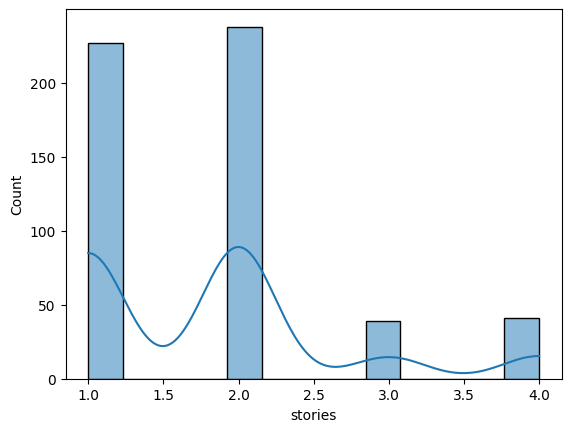

In [15]:
sns.histplot(df['stories'], kde=True)

In [16]:
obj_data = df.select_dtypes(include=['object'])
obj_data.head()

,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,furnishingstatus
0,yes,no,no,no,yes,yes,furnished
1,yes,no,no,no,yes,no,furnished
2,yes,no,yes,no,no,yes,semi-furnished
3,yes,no,yes,no,yes,yes,furnished
4,yes,yes,yes,no,yes,no,furnished


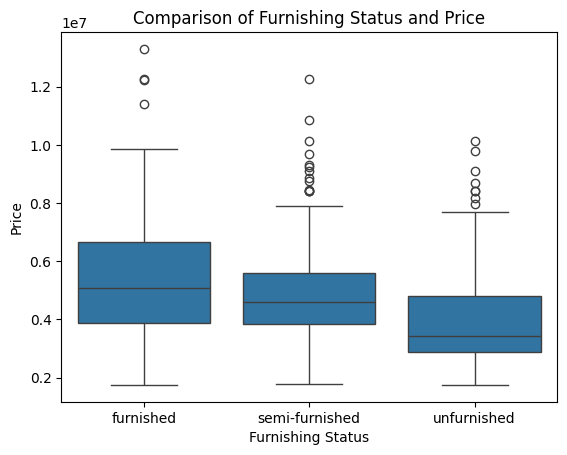

In [17]:
sns.boxplot(x='furnishingstatus', y='price', data=df)
plt.title("Comparison of Furnishing Status and Price")
plt.xlabel("Furnishing Status")
plt.ylabel("Price")
plt.show()

In [18]:
bin_data = ['mainroad',	'guestroom',	'basement',	'hotwaterheating',	'airconditioning',	'prefarea']
for col in bin_data:
  df[col] = df[col].map({'yes':1, 'no':0})

In [19]:
df['furnishingstatus'].unique()

array(['furnished', 'semi-furnished', 'unfurnished'], dtype=object)

In [20]:
mapping = {
    'unfurnished':0,
    'semi-furnished':1,
    'furnished':2


}
df['furnishingstatus'] = df['furnishingstatus'].map(mapping)

In [21]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,log_price,area_log
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,2,16.403275,8.911934
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,2,16.321036,9.100526
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,16.321036,9.206332
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,2,16.318175,8.922658
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,2,16.250001,8.911934


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             545 non-null    int64  
 1   area              545 non-null    int64  
 2   bedrooms          545 non-null    int64  
 3   bathrooms         545 non-null    int64  
 4   stories           545 non-null    int64  
 5   mainroad          545 non-null    int64  
 6   guestroom         545 non-null    int64  
 7   basement          545 non-null    int64  
 8   hotwaterheating   545 non-null    int64  
 9   airconditioning   545 non-null    int64  
 10  parking           545 non-null    int64  
 11  prefarea          545 non-null    int64  
 12  furnishingstatus  545 non-null    int64  
 13  log_price         545 non-null    float64
 14  area_log          545 non-null    float64
dtypes: float64(2), int64(13)
memory usage: 64.0 KB


In [23]:
from sklearn.model_selection import train_test_split

In [24]:
x = df.drop(columns=['price','log_price','area_log'])
y = df['price']

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [25]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [26]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [27]:
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

y_pred = model.predict(x_test)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("R2 Score", r2)
print("RMSE", rmse)

R2 Score 0.6494754192267792
RMSE 1331071.4167895128
